In [48]:
import pandas as pd 
import seaborn as sns

In [49]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [50]:
data.rename(columns={"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},inplace=True)

data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot: xlabel='sorting_time', ylabel='delivery_time'>

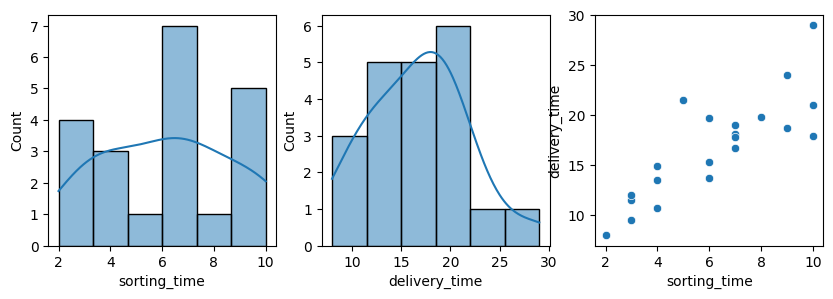

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
sns.histplot(data['sorting_time'],kde=True)

plt.subplot(1,3,2)
sns.histplot(data['delivery_time'],kde=True)

plt.subplot(1,3,3)
sns.scatterplot(x=data['sorting_time'],y=data['delivery_time'])

## Fitting a Linear Regression Model

In [52]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data=data).fit()

<AxesSubplot: xlabel='sorting_time', ylabel='delivery_time'>

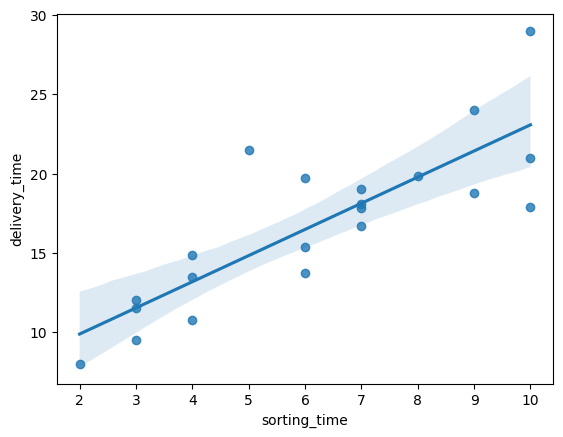

In [53]:
sns.regplot(x='sorting_time',y='delivery_time',data=data)

In [54]:
model.params    # coefficient

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [55]:
print(model.tvalues, '\n', model.pvalues)   # t-values and p-values

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [56]:
model.rsquared,model.rsquared_adj   # r-squared value

(0.6822714748417231, 0.6655489208860244)

## Predict for new data point

In [58]:
newdata = pd.Series([18,20,60])

data_pred = pd.DataFrame(newdata,columns=['sorting_time'])

data_pred['DeliveryTime'] = model.predict(data_pred)

data_pred

,sorting_time,DeliveryTime
0,18,36.265092
1,20,39.563132
2,60,105.523928
